# 📈 Análise Exploratória (EDA)
## 🔄 Ajuste do Diretório de Trabalho

Antes de carregar ou manipular arquivos, é importante garantir que estamos no diretório correto do projeto.  
O código abaixo verifica se o notebook está sendo executado a partir da pasta `notebooks`. Se for o caso, ele sobe um nível na hierarquia de diretórios para garantir que o diretório de trabalho seja a raiz do projeto.

Isso é útil para manter caminhos relativos consistentes ao acessar dados, scripts ou outros recursos do projeto.

📌 **Resumo do que o código faz:**
- Verifica se o diretório atual termina com `notebooks`.
- Se sim, volta uma pasta (para a raiz do projeto).
- Exibe o novo diretório de trabalho.


In [12]:
import os

# Verifica se o diretório de trabalho atual termina com 'notebooks'
if os.path.basename(os.getcwd()) == 'notebooks':
    # Se sim, sobe um nível de diretório para a pasta raiz do projeto
    os.chdir('..')

# Imprime o diretório de trabalho para confirmar que a mudança foi feita
print(f"Diretório de Trabalho Atual: {os.getcwd()}")

Diretório de Trabalho Atual: c:\Users\Carlo\Desktop\Portfolio\postech-challenge-ibov


## ⚙️ Carregamento de Bibliotecas e Configurações do Projeto

Nesta etapa, realizamos a importação das principais bibliotecas que serão utilizadas ao longo do projeto, organizadas por finalidade:

- 📁 **Configurações do Projeto**:  
  Importamos o módulo `src.config`, que armazena configurações como caminhos de arquivos, variáveis globais e parâmetros fixos.

- 📊 **Manipulação de Dados**:  
  - `pandas` e `numpy` para operações de estruturação e análise de dados.  
  - `duckdb` para consultas SQL diretamente em DataFrames.

- ⚙️ **Engenharia de Atributos**:  
  - `pandas_ta` é uma biblioteca especializada para análise técnica, útil para projetos com dados temporais (ex: séries financeiras).

- 📈 **Visualização de Dados**:  
  - `matplotlib.pyplot` e `seaborn` para construção de gráficos interativos e estilizados.

- 🧰 **Helpers do Notebook**:  
  - `display` do `IPython` facilita a visualização de objetos em células do notebook.

Além disso, aplicamos configurações visuais para padronizar os gráficos:
- Tema `whitegrid` do Seaborn.
- Estilo `fivethirtyeight` do Matplotlib.
- Habilitação do modo inline para que os gráficos sejam renderizados dentro do notebook.

```python
print("✅ Bibliotecas carregadas com sucesso!")


In [13]:
# --- Configurações do Projeto ---
# Importa nossas configurações (ex: caminho do DB)
import src.config as config

# --- Manipulação de Dados ---
import pandas as pd
import numpy as np
import duckdb

# --- Engenharia de Atributos ---
import pandas_ta as ta

# --- Visualização ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helpers do Notebook ---
from IPython.display import display

# Garante que os gráficos sejam exibidos no notebook
%matplotlib inline 

print("✅ Bibliotecas carregadas com sucesso!")

✅ Bibliotecas carregadas com sucesso!


## 🧰 Configuração de Estilo e Exibição de Dados

Antes de iniciar a análise, definimos algumas configurações visuais e de exibição para melhorar a legibilidade dos outputs e a consistência gráfica.

### 📊 Configurações do `pandas`
- `max_columns = 100`: Permite visualizar até 100 colunas sem truncamento.
- `max_rows = 100`: Permite visualizar até 100 linhas diretamente no output.
- `float_format = '{:.2f}'`: Formata números decimais com 2 casas, facilitando a leitura.

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
```

In [14]:
# Pandas display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Estilo visual com Seaborn (engloba Matplotlib)
sns.set_theme(
    context='notebook',
    style='whitegrid',
    palette='viridis',
    font='sans-serif',
    font_scale=1.1,
    rc={
        'figure.figsize': (12, 6),
        'font.size': 12,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'lines.linewidth': 2,
        'grid.alpha': 0.3
    }
)

## 🗃️ Carregamento dos Dados - Fase 1

Nesta etapa, conectamos ao banco de dados local gerado na **Fase 1** do pipeline para carregar os dados da tabela `precos_diarios`.

Utilizamos o **DuckDB**, um banco de dados analítico embutido, eficiente para análise local de dados com sintaxe SQL.

📌 **Etapas realizadas:**
1. O caminho do banco de dados (`DB_PATH`) é recuperado do módulo de configurações `config`.
2. Estabelecemos uma conexão com o DuckDB em modo **somente leitura** (`read_only=True`), garantindo integridade.
3. Executamos uma query SQL para obter todos os registros da tabela `precos_diarios`.
4. A conexão é encerrada após a leitura.
5. O dataframe resultante é exibido com:
   - `df.info()` para verificar a estrutura.
   - `df.head()` para visualizar as primeiras linhas.

Em caso de falha, uma mensagem de erro orienta o usuário a verificar se o pipeline da Fase 1 foi executado corretamente e se o arquivo do banco existe no local esperado.


In [15]:
# --- Carregando os dados da Fase 1 ---

# O caminho para o banco de dados já está no nosso módulo 'config'
db_path = str(config.DB_PATH)

print(f"Carregando dados de: {db_path}")

try:
    # Conecta ao banco de dados DuckDB em modo de apenas leitura
    con = duckdb.connect(database=db_path, read_only=True)

    # Executa uma query SQL para selecionar todos os dados da nossa tabela
    df = con.execute("SELECT * FROM precos_diarios").fetchdf()

    # Fecha a conexão com o banco de dados
    con.close()

    # --- Verificação ---
    print("\n✅ Dados carregados com sucesso! Verificando a estrutura:")
    df.info()

    print("\nExibindo as 5 primeiras linhas:")
    display(df.head())

except Exception as e:
    print(f"❌ Ocorreu um erro ao carregar os dados: {e}")
    print("Verifique se o pipeline da Fase 1 foi executado com sucesso e se o arquivo do banco de dados existe no local correto.")

Carregando dados de: C:\Users\Carlo\Desktop\Portfolio\postech-challenge-ibov\data\mercados.duckdb

✅ Dados carregados com sucesso! Verificando a estrutura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data                  3000 non-null   object 
 1   close_petroleo_brent  3000 non-null   float64
 2   close_petrobras       3000 non-null   float64
 3   close_dolar           3000 non-null   float64
 4   close_ibovespa        3000 non-null   float64
 5   close_sp500           3000 non-null   float64
 6   high_petroleo_brent   3000 non-null   float64
 7   high_petrobras        3000 non-null   float64
 8   high_dolar            3000 non-null   float64
 9   high_ibovespa         3000 non-null   float64
 10  high_sp500            3000 non-null   float64
 11  low_petroleo_brent    3000 non-null   float64
 12  low_petrobras     

,data,close_petroleo_brent,close_petrobras,close_dolar,close_ibovespa,close_sp500,high_petroleo_brent,high_petrobras,high_dolar,high_ibovespa,high_sp500,low_petroleo_brent,low_petrobras,low_dolar,low_ibovespa,low_sp500,open_petroleo_brent,open_petrobras,open_dolar,open_ibovespa,open_sp500,semana_do_mes
0,2014-01-01,95.44,6.15,2.36,50341.00,1831.98,98.97,6.32,2.36,51656.00,1845.86,95.34,6.11,2.35,50246.00,1827.74,98.50,6.30,2.36,51522.00,1845.86,1
1,2014-01-02,95.44,6.15,2.36,50341.00,1831.98,98.97,6.32,2.41,51656.00,1845.86,95.34,6.11,2.35,50246.00,1827.74,98.50,6.30,2.36,51522.00,1845.86,1
2,2014-01-03,93.96,6.06,2.38,50981.00,1831.37,95.74,6.16,2.39,50981.00,1838.24,93.86,6.03,2.36,50269.00,1829.13,95.47,6.15,2.38,50348.00,1833.21,1
3,2014-01-06,93.43,6.10,2.37,50974.00,1826.77,94.59,6.11,2.38,51002.00,1837.16,93.20,5.93,2.36,50451.00,1823.73,94.18,6.04,2.37,50980.00,1832.31,1
4,2014-01-07,93.67,5.93,2.37,50430.00,1837.88,94.22,6.18,2.37,51478.00,1840.10,93.35,5.92,2.34,50429.00,1828.71,93.60,6.11,2.37,50982.00,1828.71,1


## 🗓️ Ajuste do Índice Temporal

Para garantir uma manipulação adequada de séries temporais, realizamos o ajuste da coluna `data`, transformando-a no índice principal do DataFrame.

📌 **Etapas executadas:**
1. Convertida a coluna `'data'` para o tipo `datetime` com `pd.to_datetime()` para garantir que operações temporais funcionem corretamente (ex: resampling, filtros por período).
2. Definida como **índice do DataFrame** com `df.set_index('data', inplace=True)`, substituindo o índice numérico padrão.
3. Exibimos as primeiras linhas para confirmar a alteração, verificando que `'data'` agora aparece como índice à esquerda do DataFrame.

Esse passo é essencial em análises temporais, especialmente para séries de preços, permitindo ordenação cronológica, reamostragem e outras operações baseadas em tempo.


In [16]:
# Garante que a coluna 'data' esteja no formato datetime, caso ainda não esteja
df['data'] = pd.to_datetime(df['data'])

# Define a coluna 'data' como o novo índice do DataFrame
# O inplace=True modifica o DataFrame diretamente
df.set_index('data', inplace=True)

# Exibe as primeiras linhas para confirmar a mudança. 
# Note que 'data' agora está no lugar do índice numérico.
print("✅ Coluna 'data' definida como índice. A estrutura agora é:")
display(df.head())

✅ Coluna 'data' definida como índice. A estrutura agora é:


,close_petroleo_brent,close_petrobras,close_dolar,close_ibovespa,close_sp500,high_petroleo_brent,high_petrobras,high_dolar,high_ibovespa,high_sp500,low_petroleo_brent,low_petrobras,low_dolar,low_ibovespa,low_sp500,open_petroleo_brent,open_petrobras,open_dolar,open_ibovespa,open_sp500,semana_do_mes
data,,,,,,,,,,,,,,,,,,,,,
2014-01-01,95.44,6.15,2.36,50341.00,1831.98,98.97,6.32,2.36,51656.00,1845.86,95.34,6.11,2.35,50246.00,1827.74,98.50,6.30,2.36,51522.00,1845.86,1
2014-01-02,95.44,6.15,2.36,50341.00,1831.98,98.97,6.32,2.41,51656.00,1845.86,95.34,6.11,2.35,50246.00,1827.74,98.50,6.30,2.36,51522.00,1845.86,1
2014-01-03,93.96,6.06,2.38,50981.00,1831.37,95.74,6.16,2.39,50981.00,1838.24,93.86,6.03,2.36,50269.00,1829.13,95.47,6.15,2.38,50348.00,1833.21,1
2014-01-06,93.43,6.10,2.37,50974.00,1826.77,94.59,6.11,2.38,51002.00,1837.16,93.20,5.93,2.36,50451.00,1823.73,94.18,6.04,2.37,50980.00,1832.31,1
2014-01-07,93.67,5.93,2.37,50430.00,1837.88,94.22,6.18,2.37,51478.00,1840.10,93.35,5.92,2.34,50429.00,1828.71,93.60,6.11,2.37,50982.00,1828.71,1


## 📈 Visualização das Séries Temporais de Valor de Fechamento

Agora que o índice do DataFrame está configurado como uma série temporal (`data`), selecionamos apenas as colunas que representam Valor de fechamento (prefixo `close_`) para visualização.

📌 **Etapas realizadas:**
1. Utilizamos `df.filter(like='close')` para selecionar automaticamente todas as colunas com o prefixo `close_`, representando os preços de fechamento dos ativos.

2. Criamos múltiplos **subplots verticais**, um para cada ativo, com os seguintes parâmetros:
   - `nrows`: igual ao número de ativos.
   - `sharex=True`: todos os gráficos compartilham o mesmo eixo X (tempo), permitindo alinhamento temporal.

3. Cada subplot exibe a série temporal de um ativo individualmente:
   - O título de cada subplot é o nome da coluna (ativo).
   - O eixo Y representa o preço de fechamento.
   - A legenda é omitida (`legend=False`) para evitar poluição visual.

4. Um **título geral** é adicionado à figura, e o layout é ajustado com `tight_layout()` para evitar sobreposição de elementos.

Essa abordagem é útil para observar a evolução temporal individual dos ativos e comparar suas tendências visuais ao longo do tempo.


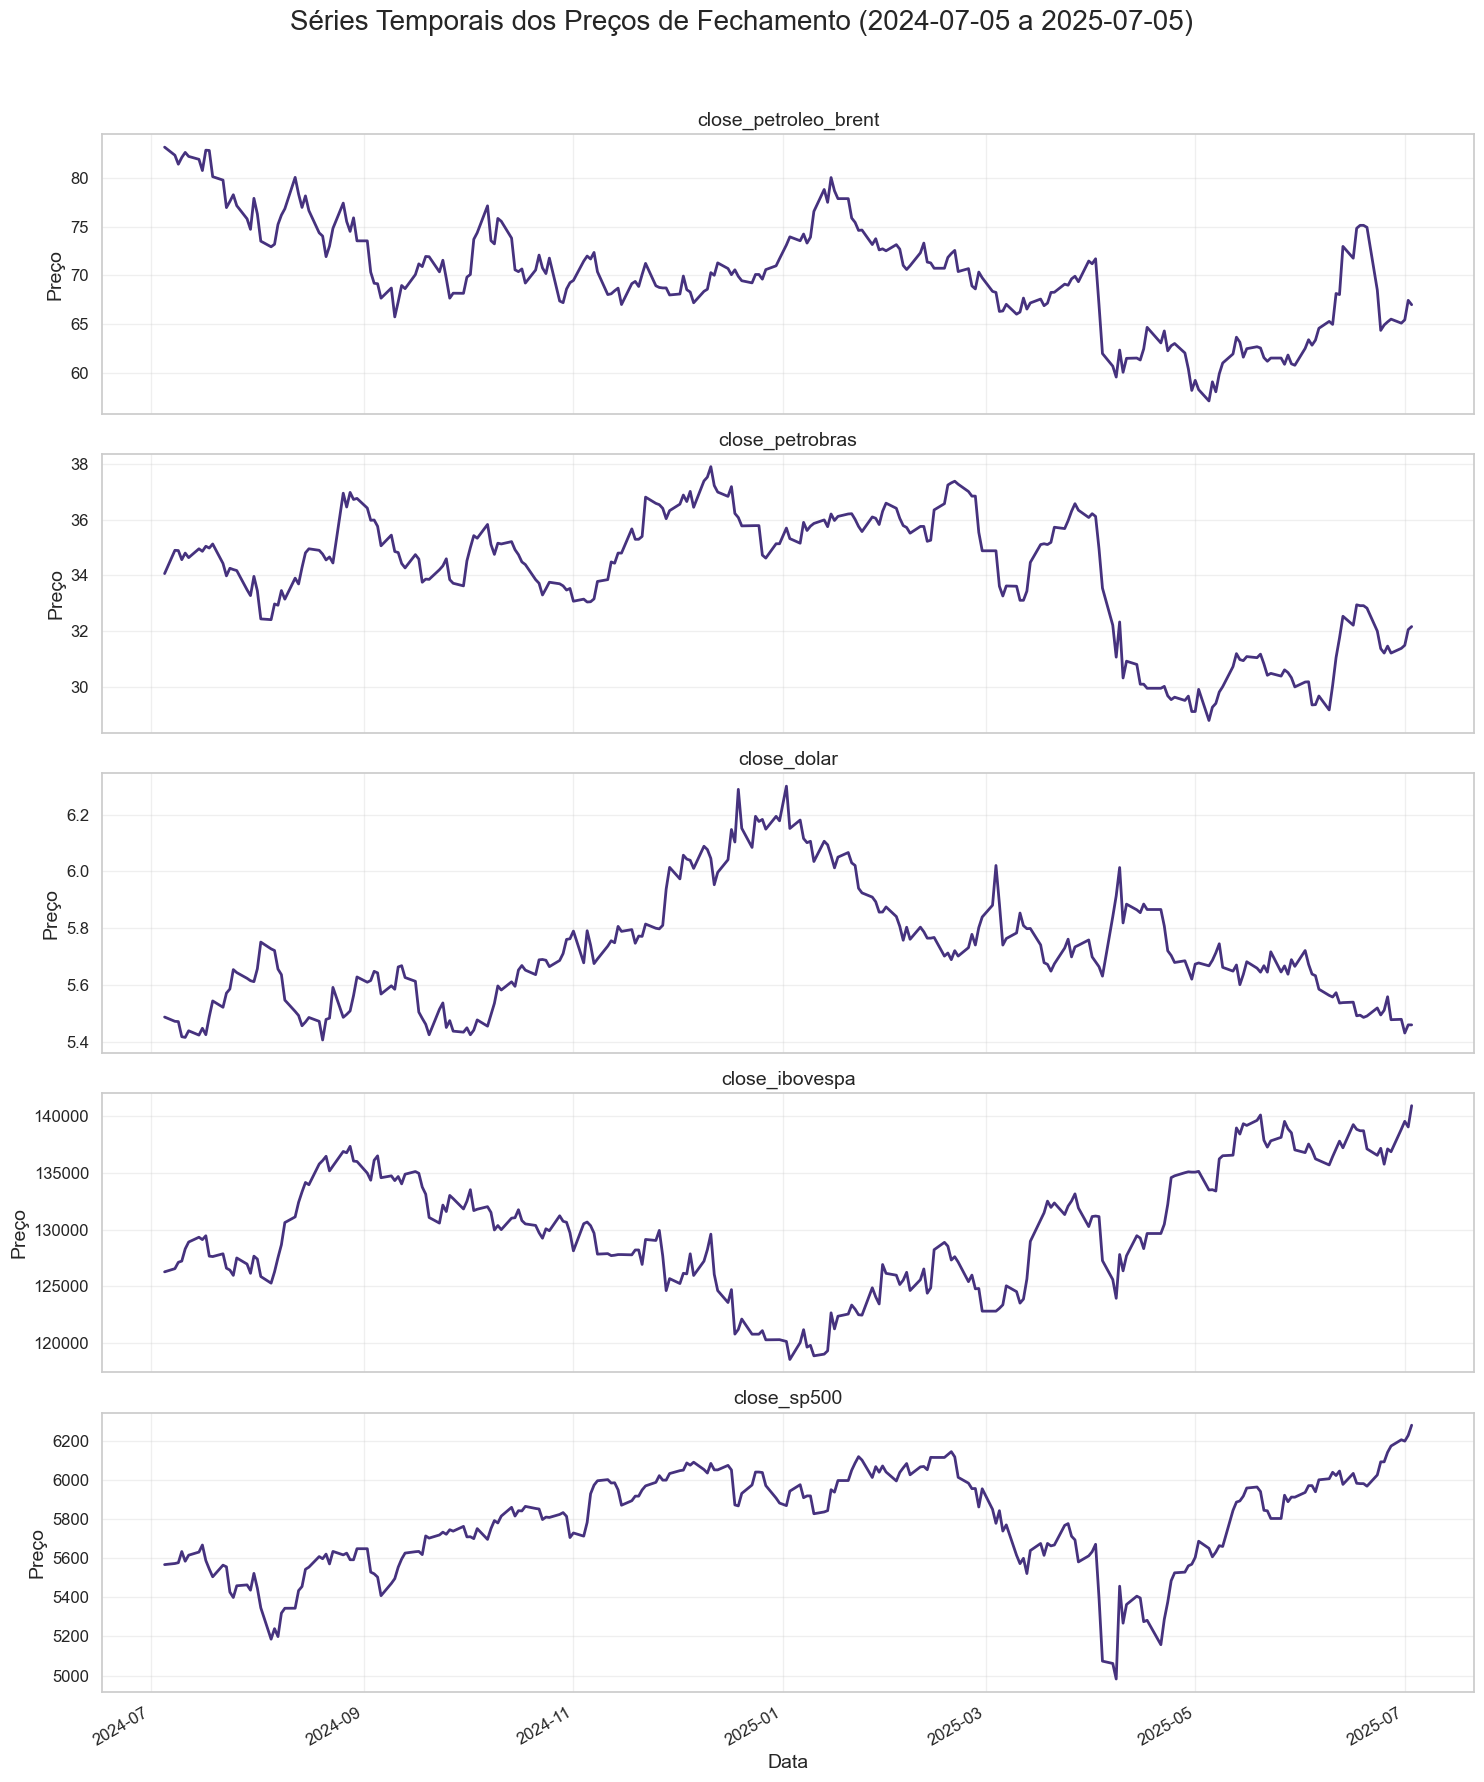

In [25]:
# O DataFrame 'df' já foi carregado e está com o índice de data configurado

# --- FILTRAGEM DE DADOS PARA O PERÍODO DE 2 ANOS ---

# 1. Define o período de análise desejado
start_date_2y = '2024-07-05'
end_date_2y = '2025-07-05'

# 2. Seleciona as colunas de fechamento
df_close = df.filter(like='close')

# 3. Filtra o DataFrame para conter apenas os dados do período de 2 anos
# Usamos .loc[] para fatiar o DataFrame com base no índice de data
df_close_2y = df_close.loc[start_date_2y:end_date_2y]

# ---------------------------------------------------


# --- Criação dos Gráficos ---

# Cria uma figura com múltiplos subplots, um para cada ativo.
fig, axes = plt.subplots(
    nrows=len(df_close_2y.columns), 
    ncols=1, 
    figsize=(15, 20), 
    sharex=True
)

# Define um título geral para a figura inteira
fig.suptitle(f'Séries Temporais dos Preços de Fechamento ({start_date_2y} a {end_date_2y})', fontsize=20, y=0.92)

# Itera sobre cada coluna de preço e cria um gráfico no seu respectivo eixo (subplot)
# Note que agora usamos o DataFrame filtrado: df_close_2y
for i, column in enumerate(df_close_2y.columns):
    ax = axes[i]
    df_close_2y[column].plot(ax=ax, legend=False)
    ax.set_title(column, fontsize=14)
    ax.set_ylabel('Preço')

# Ajusta o layout e o eixo x final
plt.xlabel('Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

## 📈 Cálculo e Distribuição dos Retornos Diários

Para analisar a variação percentual dos preços ao longo do tempo, calculamos os **retornos diários** dos ativos com base nas colunas de preços de fechamento.

### 🔢 Cálculo dos Retornos:
- Utilizamos `.pct_change()` para calcular a variação percentual diária de cada ativo.
- A primeira linha é removida com `.dropna()` pois não possui valor de referência para o cálculo do retorno.

```python
df_returns = df.filter(like='close').pct_change().dropna()


Retornos diários calculados. Exibindo as 5 primeiras linhas:


,close_petroleo_brent,close_petrobras,close_dolar,close_ibovespa,close_sp500
data,,,,,
2014-01-02,0.00,0.00,-0.00,0.00,0.00
2014-01-03,-0.02,-0.01,0.01,0.01,-0.00
2014-01-06,-0.01,0.01,-0.01,-0.00,-0.00
2014-01-07,0.00,-0.03,0.00,-0.01,0.01
2014-01-08,-0.01,0.00,-0.00,0.00,-0.00


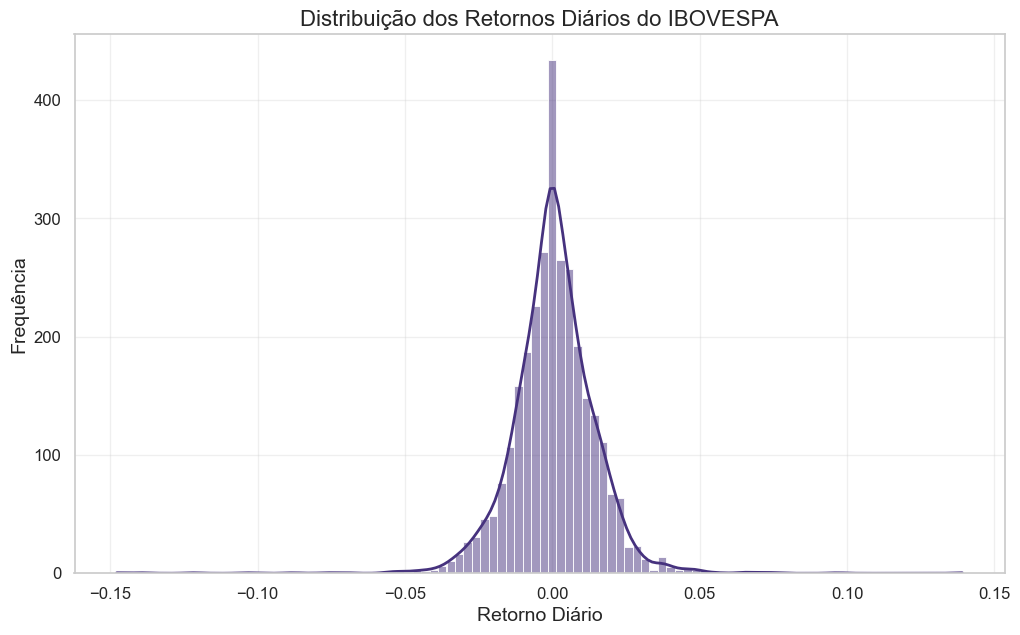

In [22]:
# --- Cálculo dos Retornos Diários ---

# Seleciona as colunas de fechamento e calcula a variação percentual diária
df_returns = df.filter(like='close').pct_change()

# O primeiro dia não tem retorno, então a primeira linha será NaN. Vamos removê-la.
df_returns = df_returns.dropna()

print("Retornos diários calculados. Exibindo as 5 primeiras linhas:")
display(df_returns.head())


# --- Visualização da Distribuição de Retornos do Ibovespa ---

# Usando o Seaborn para criar um histograma com uma curva de densidade (KDE)
plt.figure(figsize=(12, 7))
sns.histplot(df_returns['close_ibovespa'], kde=True, bins=100)

plt.title('Distribuição dos Retornos Diários do IBOVESPA')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

### Análise da Distribuição de Retornos do IBOVESPA

O histograma acima nos fornece um "raio-X" do comportamento diário do IBOVESPA, revelando as seguintes características-chave:

* **Centro da Distribuição:** Como esperado para retornos diários de mercado, a distribuição está fortemente centrada em **próximo de zero**. Isso indica que, na maioria dos dias, a variação do índice é mínima, seja ela positiva ou negativa.

* **Concentração e Volatilidade:** O pico alto e estreito da curva demonstra que a grande maioria dos retornos diários se concentra em um intervalo pequeno (aproximadamente de -2% a +2%). Isso significa que dias de baixa volatilidade são muito mais frequentes do que dias de grandes movimentações.

* **Caudas Pesadas (Leptocurtose):** Esta é a observação mais importante para a nossa modelagem. As "caudas" da distribuição, que se estendem para além de -10% e +10%, são visivelmente mais pronunciadas do que em uma distribuição normal (curva de sino).
    * **Implicação Prática:** **Eventos extremos**, tanto positivos quanto negativos, são **mais comuns** do que um modelo estatístico simples poderia prever. Nosso futuro modelo preditivo precisa ser robusto o suficiente para não ser excessivamente influenciado por esses "dias atípicos", que são uma característica inerente do mercado.

* **Simetria:** A distribuição aparenta ser razoavelmente simétrica, sugerindo que não há um viés significativo para retornos diários negativos ou positivos em termos de frequência histórica.

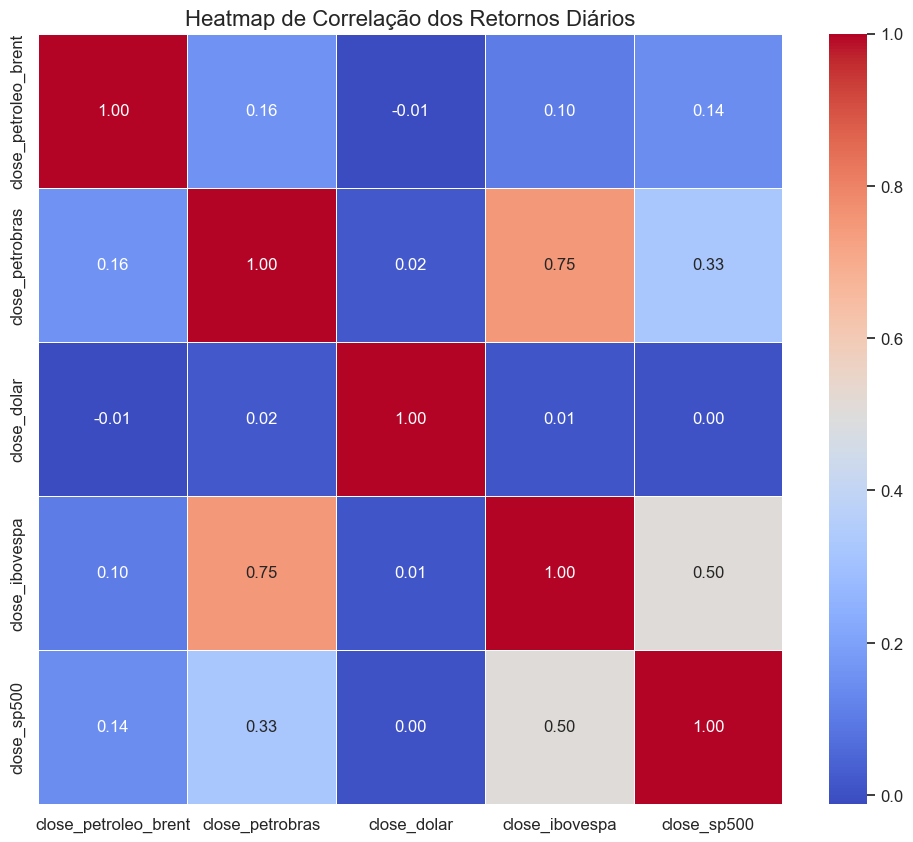


Matriz de Correlação:


,close_petroleo_brent,close_petrobras,close_dolar,close_ibovespa,close_sp500
close_petroleo_brent,1.00,0.16,-0.01,0.10,0.14
close_petrobras,0.16,1.00,0.02,0.75,0.33
close_dolar,-0.01,0.02,1.00,0.01,0.00
close_ibovespa,0.10,0.75,0.01,1.00,0.50
close_sp500,0.14,0.33,0.00,0.50,1.00


In [26]:
# O DataFrame 'df_returns' foi calculado na célula anterior e já contém os retornos diários.

# 1. Calcular a matriz de correlação
correlation_matrix = df_returns.corr()

# 2. Criar o heatmap para visualizar a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True,          # Mostra os valores de correlação no mapa
    cmap='coolwarm',     # Escolhe um mapa de cores que distingue bem positivo/negativo
    fmt=".2f",           # Formata os números com duas casas decimais
    linewidths=.5
)

plt.title('Heatmap de Correlação dos Retornos Diários')
plt.show()

# Exibe a matriz de correlação como uma tabela para referência
print("\nMatriz de Correlação:")
display(correlation_matrix)

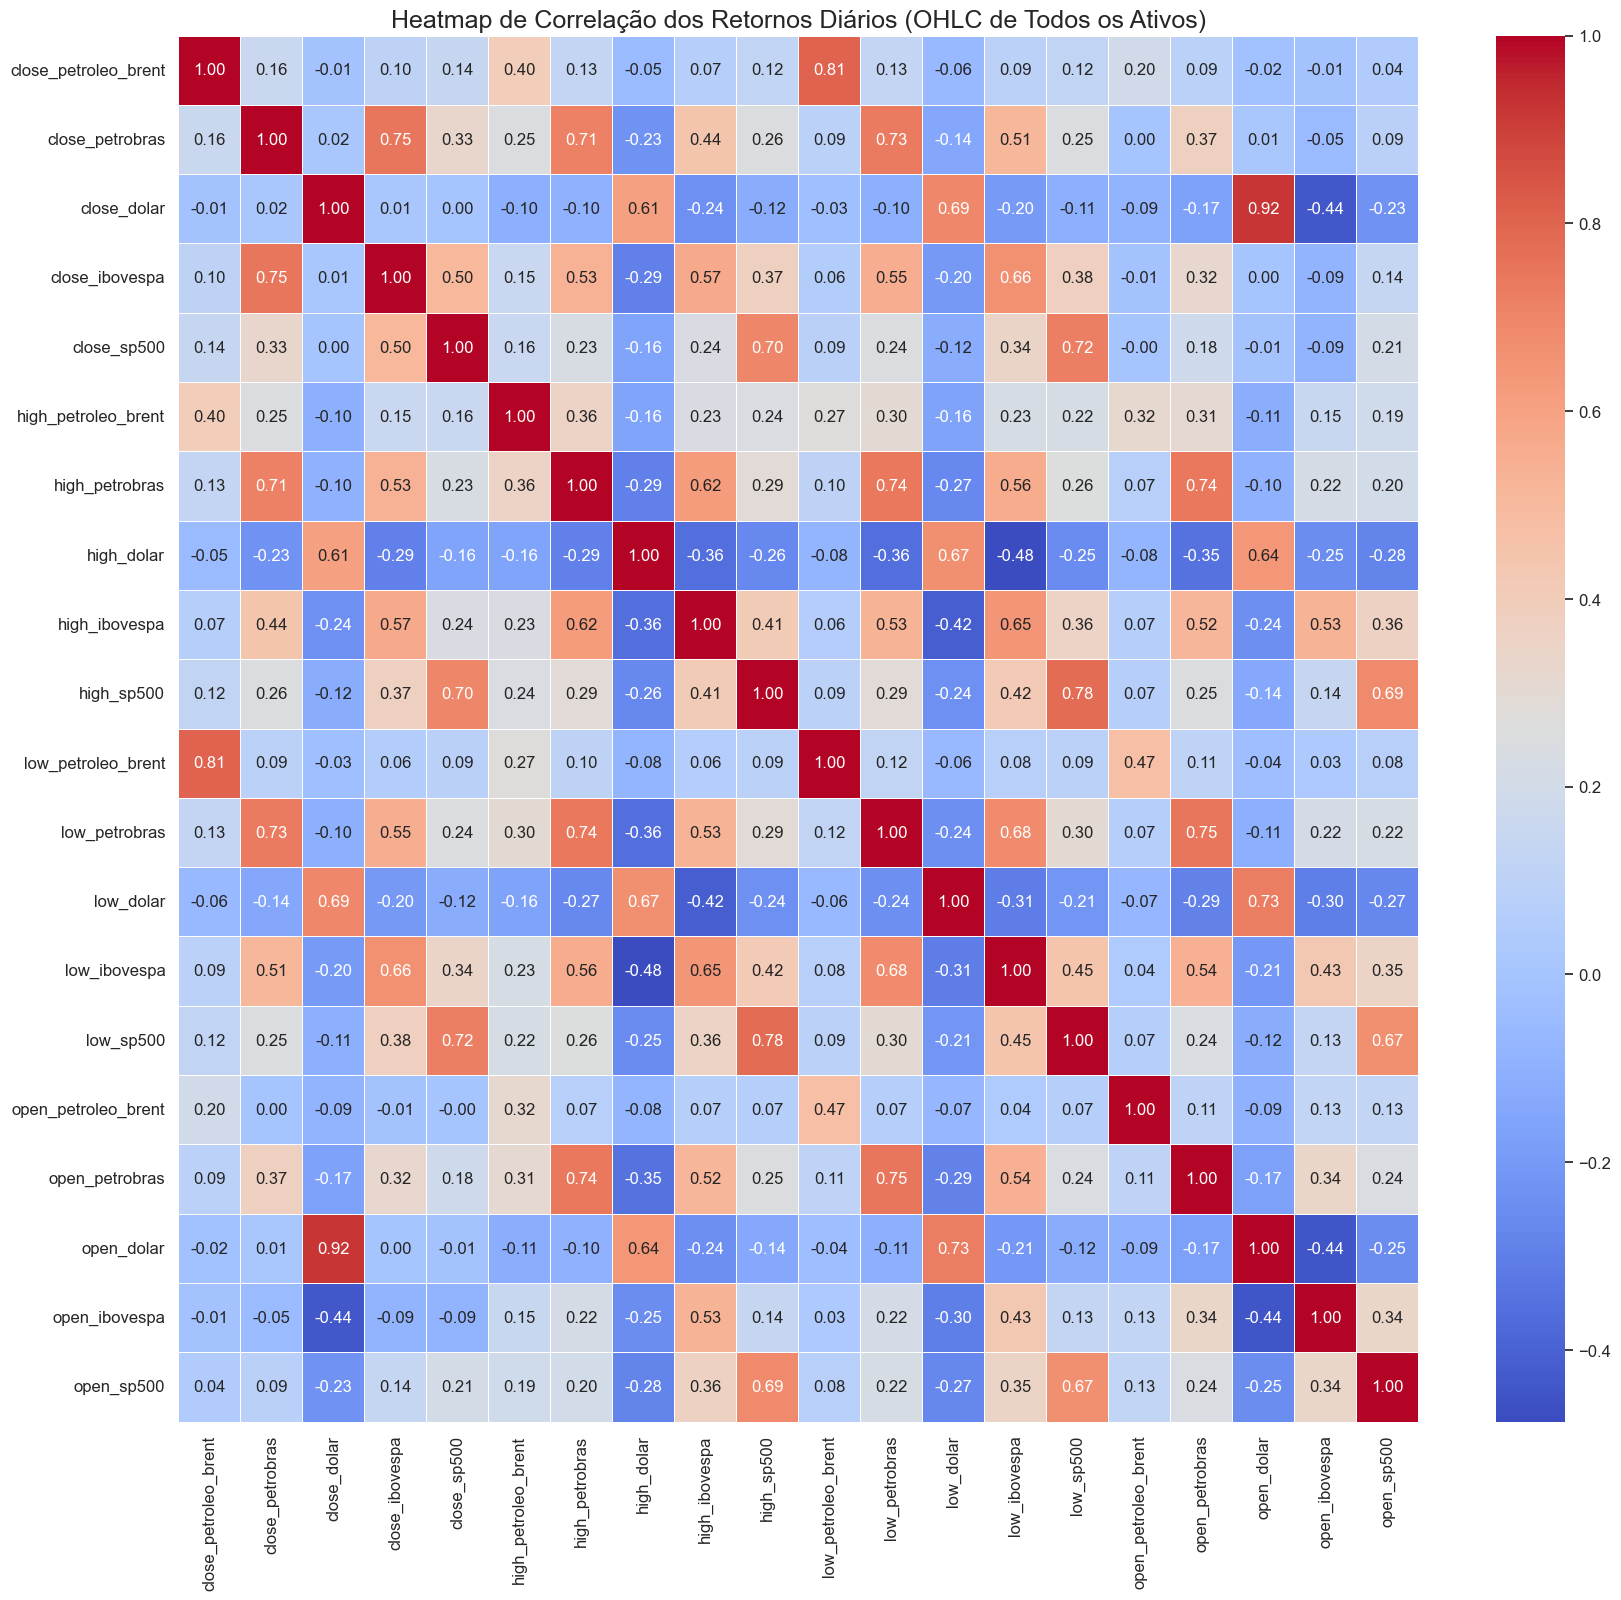

In [27]:
# O DataFrame 'df' já foi carregado e está com o índice de data.
# Ele contém todas as nossas colunas OHLC já renomeadas (ex: 'open_ibovespa').

# 1. Calcula os retornos diários para TODAS as colunas do DataFrame
# (exceto a 'semana_do_mes', que não é um preço)
df_returns_ohlc = df.drop(columns=['semana_do_mes']).pct_change()

# 2. Remove a primeira linha que será NaN
df_returns_ohlc = df_returns_ohlc.dropna()

# 3. Agora sim, calculamos a matriz de correlação sobre esses retornos
correlation_matrix_ohlc = df_returns_ohlc.corr()

# 4. Plotamos o heatmap
# Aumentamos o tamanho da figura para acomodar a matriz maior
plt.figure(figsize=(20, 18))
sns.heatmap(
    correlation_matrix_ohlc, 
    annot=True,          # Mostra os valores
    cmap='coolwarm',     # Mapa de cores
    fmt=".2f",           # Formato dos números
    linewidths=.5
)
plt.title('Heatmap de Correlação dos Retornos Diários (OHLC de Todos os Ativos)', fontsize=18)
plt.show()

## 🔥 Análise do Heatmap de Correlação (Retornos Diários OHLC)

O mapa de calor apresenta as correlações lineares entre os retornos diários dos ativos com base nas métricas OHLC (Open, High, Low, Close). A análise focada no comportamento do **Ibovespa** destaca relações relevantes com outros indicadores de mercado:

---

### 📌 **Principais Insights:**

#### 🇺🇸 Forte Influência do Mercado Americano (S&P 500)
- A correlação entre **`close_ibovespa`** e **`close_sp500`** é de **+0.50**.
- Esta relação positiva, presente de forma consistente nas métricas OHLC, reforça a ideia de que o humor do mercado norte-americano impacta diretamente o mercado brasileiro.

#### 🧭 Dinâmica Interna Surpreendente do IBOVESPA
- A correlação entre **`open_ibovespa`** e **`close_ibovespa`** é quase **nula (-0.05)**.
- Isso indica que o preço de abertura não antecipa o comportamento do fechamento no mesmo dia, sugerindo que o movimento intradiário define a direção do mercado.

#### 💵 Relação Inversa com o Dólar
- A correlação entre **`close_ibovespa`** e **`close_dolar`** é de **-0.10**.
- Apesar de fraca, essa relação negativa confirma a dinâmica clássica de aversão ao risco, onde a alta do dólar está associada à queda do mercado acionário.

#### 🛢️ Impacto de Ações-Chave (Petrobras)
- A correlação entre **`close_ibovespa`** e **`close_petrobras`** é de **+0.75**.
- Reforça o peso significativo de empresas como a Petrobras na formação do índice Ibovespa.

---

### 🤖 Conclusões para a Modelagem

Essa análise estatística auxilia na seleção de variáveis relevantes para modelos preditivos. Os retornos de:
- **S&P 500**
- **Petrobras**
- **Dólar**

surgem como os **candidatos mais promissores a features explicativas** do comportamento do Ibovespa, e podem ser integrados a modelos de regressão, classificação ou séries temporais em fases posteriores do projeto.


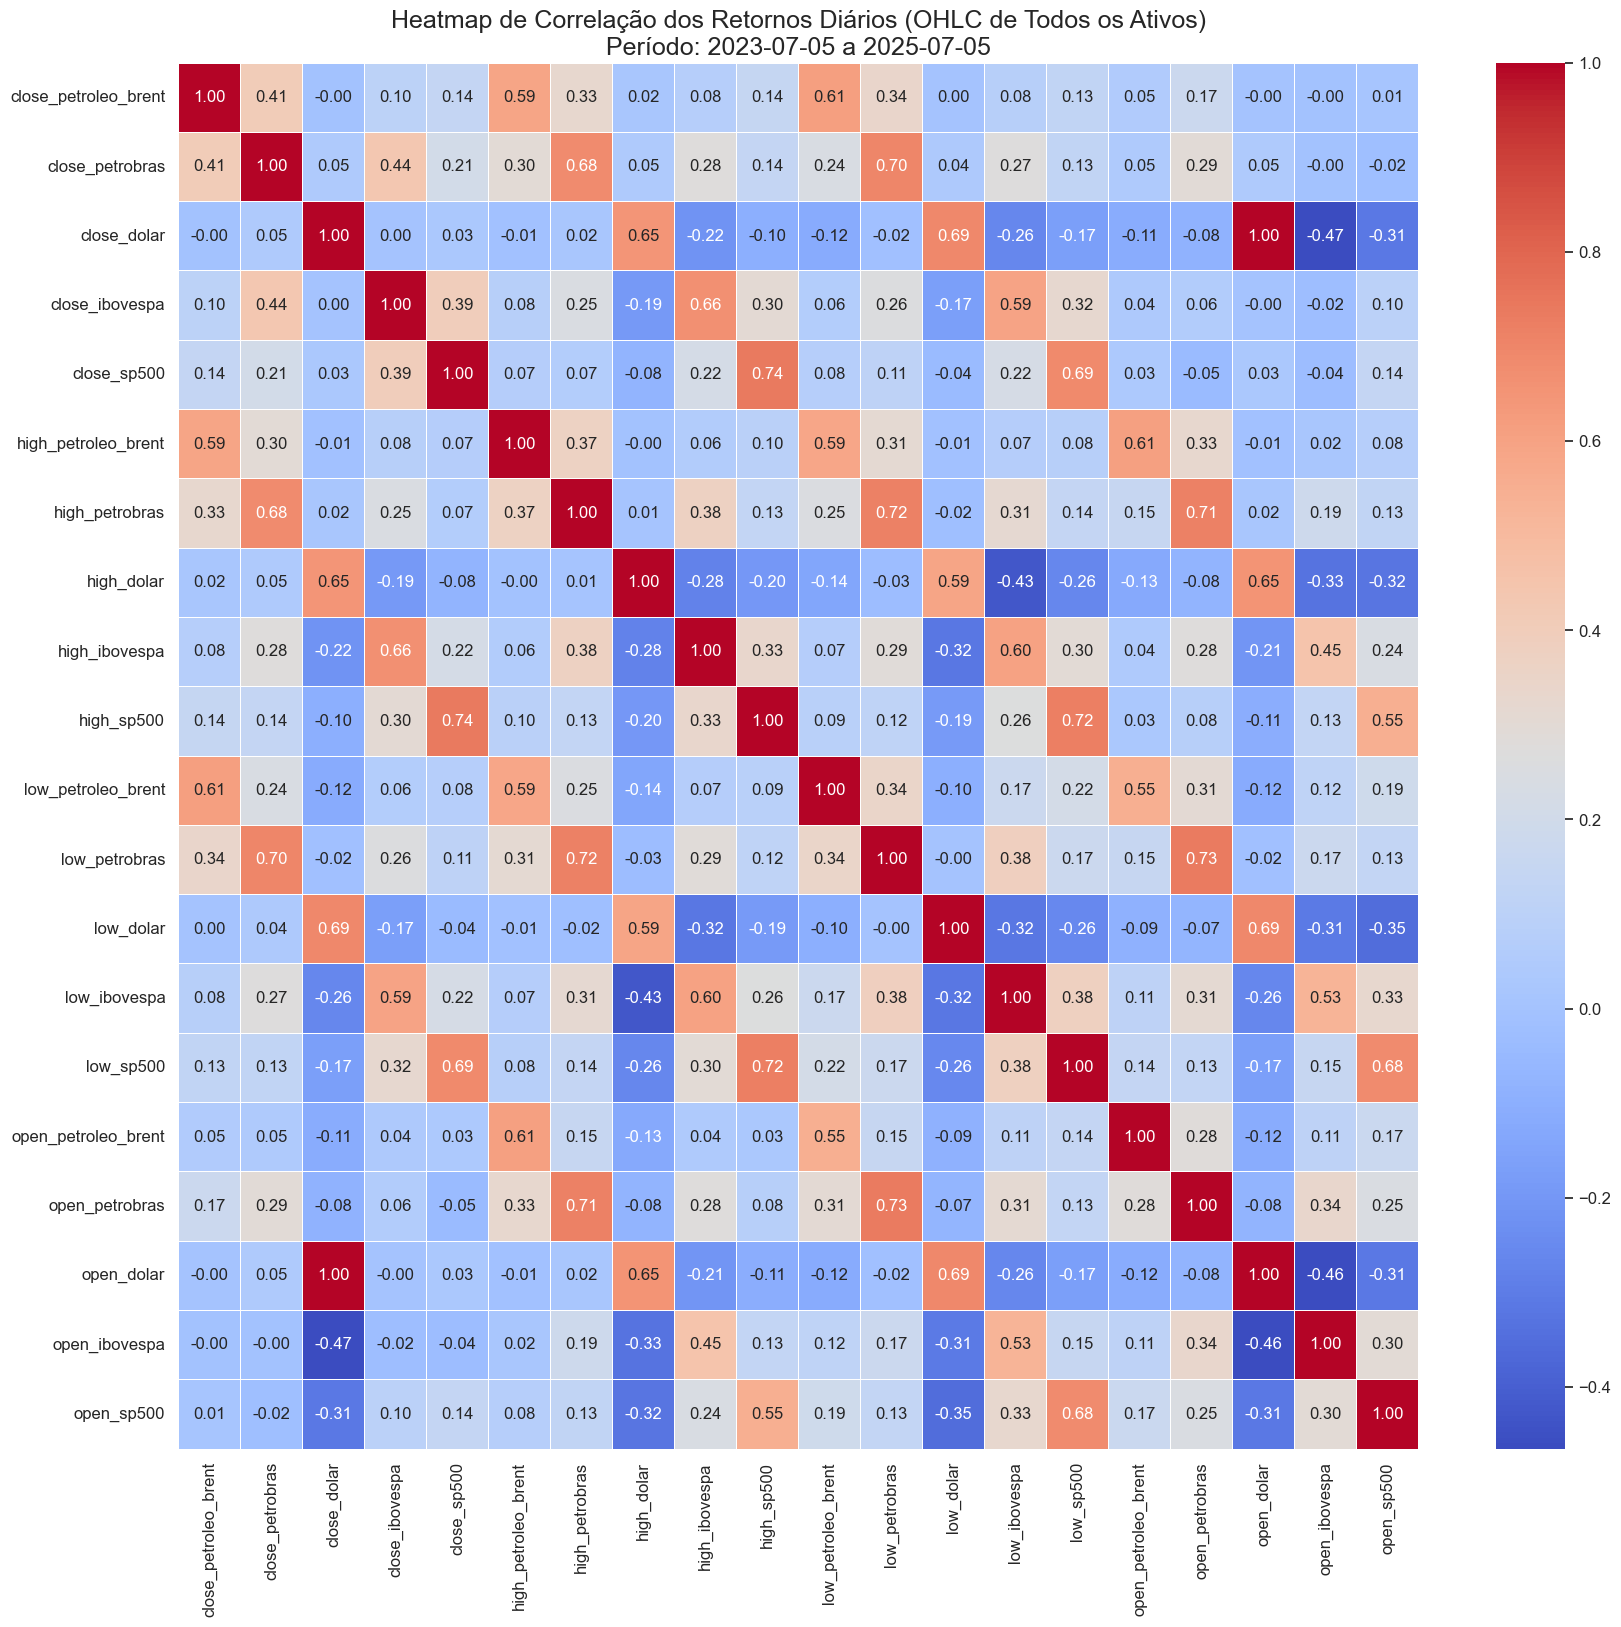

In [29]:
# Definindo o período dos últimos 2 anos
start_date_2y = '2023-07-05'
end_date_2y = '2025-07-05'

# Filtrando o DataFrame para o período de 2 anos
df_2y = df.loc[start_date_2y:end_date_2y]

# 1. Calcula os retornos diários para TODAS as colunas do DataFrame
# (exceto a 'semana_do_mes', que não é um preço)
df_returns_ohlc_2y = df_2y.drop(columns=['semana_do_mes']).pct_change()

# 2. Remove a primeira linha que será NaN
df_returns_ohlc_2y = df_returns_ohlc_2y.dropna()

# 3. Calcula a matriz de correlação sobre esses retornos
correlation_matrix_ohlc_2y = df_returns_ohlc_2y.corr()

# 4. Plotamos o heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(
    correlation_matrix_ohlc_2y, 
    annot=True,          # Mostra os valores
    cmap='coolwarm',     # Mapa de cores
    fmt=".2f",           # Formato dos números
    linewidths=.5
)
plt.title(f'Heatmap de Correlação dos Retornos Diários (OHLC de Todos os Ativos)\nPeríodo: {start_date_2y} a {end_date_2y}', fontsize=18)
plt.show()

## 🧊 Comparativo de Heatmaps: Período Completo vs. Últimos 2 Anos

Ao comparar os mapas de calor de correlação entre os retornos diários dos ativos para dois períodos — o **histórico completo** e os **últimos dois anos** —, é possível observar mudanças importantes nas relações entre os ativos. Abaixo, destacamos os principais insights extraídos dessa comparação:

---

### 1️⃣ Correlação com o S&P 500 Enfraqueceu
- **Histórico completo:** +0.50  
- **Últimos 2 anos:** +0.39  

🔍 **Insight:**  
Embora o mercado americano continue influenciando positivamente o Ibovespa, essa influência se tornou **menos direta** no período recente. Isso pode indicar maior impacto de **fatores internos** como política, juros ou desempenho setorial específico no Brasil.

---

### 2️⃣ Influência da Petrobras Diminuiu Drasticamente
- **Histórico completo:** +0.75  
- **Últimos 2 anos:** +0.44  

🔍 **Insight:**  
A **dependência do Ibovespa em relação à Petrobras** foi significativamente reduzida. Isso pode indicar a ascensão de outros setores (como financeiro, elétrico ou varejo) como principais vetores de movimento do índice no período recente.

---

### 3️⃣ Relação com o Dólar Permanece Estável (Fraca e Negativa)
- **Histórico completo:** -0.10  
- **Últimos 2 anos:** -0.08  

🔍 **Insight:**  
A dinâmica tradicional se mantém: quando o dólar sobe, a bolsa tende a cair — ainda que essa relação continue **estatisticamente fraca**.

---

### 4️⃣ Dinâmica Interna do Ibovespa se Confirma
- **Correlação open x close (Ibovespa):**
  - Histórico completo: -0.05  
  - Últimos 2 anos: -0.02  

🔍 **Insight:**  
A abertura do pregão segue sendo **pouco preditiva** do seu fechamento. A direção do mercado é, de fato, definida durante o dia de negociação. Trata-se de uma **característica estrutural estável** do índice.

---

## 🎯 Conclusão Estratégica para o Modelo

A análise revela que **as correlações entre os ativos não são estáticas** — elas variam com o tempo.

### 🧠 Implicações para a Modelagem:
- Dar **mais peso aos dados recentes** pode ser vantajoso, já que os drivers de mercado mudaram.
- **S&P 500 e Petrobras** continuam relevantes, mas com influência menor do que o histórico completo indicava.
- O **Dólar** se mantém como uma feature secundária, dada sua correlação fraca porém persistente.

Essa análise reforça a importância de aplicar **janelas móveis** ou **modelagem temporal adaptativa** para capturar mudanças de regime no comportamento do mercado.
